In [1]:
# KMEANS CLUSTERING JUPYTER NOTEBOOK
# useful imports
# basic data utils
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pal = sns.color_palette("hls", 10)

# Dimension reduction and clustering tools
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# # Model selection
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# # Metrics for how good a clustering does
# from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report


In [2]:
# Read in data
data = pd.read_csv('clean_housing_data_with_crime_rates.csv')
data.columns

Index(['State', 'City', 'Street', 'Zipcode', 'Bedroom', 'Bathroom', 'Area',
       'PPSq', 'LotArea', 'MarketEstimate', 'RentEstimate', 'Latitude',
       'Longitude', 'ListedPrice', 'density', 'source', 'military',
       'incorporated', 'timezone', 'ranking', 'zips', 'id',
       'house_coordinates', 'closest_city', 'city_coordinates',
       'distance_to_maj_city_miles', 'population_y', 'violent_crime',
       'prop_crime', 'larceny', 'vehicle_theft',
       'difference_listed_vs_estimate'],
      dtype='object')

In [3]:
# create a scatter plot of the dataset using matplotlib
# plt.scatter(data[0, :], data[1, :])
# get mean vector and covariance matrix of the dataset 
# get principal components
# pca projection and plot

In [4]:
pca = PCA(n_components=2)
scaler = StandardScaler() 

# subset of the data dataframe with variables that are relevant 
data_sub = data[['Bedroom', 'Bathroom', 'Area', 'PPSq', 'LotArea', 'MarketEstimate',
       'RentEstimate', 'ListedPrice', 'difference_listed_vs_estimate',
       'distance_to_maj_city_miles', 'violent_crime', 'prop_crime', 'larceny',
       'vehicle_theft']]

to_scale = data_sub.columns[ data_sub.dtypes == float ]
scaled = scaler.fit_transform(data_sub[to_scale])

# print(f'numeric features: {to_scale.shape[0]}')

preproc = pd.DataFrame(scaled, columns=scaler.get_feature_names_out())

preproc

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft
0,-0.481426,-0.434726,-0.483968,-0.711615,-0.155351,-0.359693,-0.328257,-0.343938,-0.076025,-0.197630,-0.658908,-0.004276,-0.276262,0.007883
1,-0.481426,-0.434726,0.063743,-0.831176,-0.085854,-0.389443,-0.366257,-0.324637,0.301418,-0.211493,-0.658908,-0.004276,-0.276262,0.007883
2,-0.481426,0.527714,1.361090,-0.970343,0.980340,-0.316106,-0.380049,-0.291397,0.020490,-0.182337,-0.658908,-0.004276,-0.276262,0.007883
3,-0.481426,-0.434726,-0.601829,-0.745677,-0.145181,-0.386214,-0.431279,-0.366563,-0.059652,-0.199989,-0.658908,-0.004276,-0.276262,0.007883
4,-0.481426,-1.397165,-0.929416,-0.899802,-0.162132,-0.456553,-0.450701,-0.431864,-0.058790,-0.214362,-0.658908,-0.004276,-0.276262,0.007883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,1.592805,0.527714,0.819446,-0.515078,-0.151961,-0.093904,-0.015813,-0.082306,0.040310,0.003320,-0.672081,-1.176411,-1.083322,-1.144155
9632,-1.518541,-0.434726,-0.099183,0.796406,0.590476,0.262287,-0.247471,0.234012,-0.079472,0.289531,-0.534668,-0.189646,-0.261258,0.089867
9633,0.555690,-0.434726,-0.087050,-0.340999,-0.158267,-0.174506,-0.184701,-0.164870,-0.020874,0.300108,-0.534668,-0.189646,-0.261258,0.089867
9634,-0.481426,0.527714,0.153873,-0.425441,-0.159775,-0.153289,-0.263797,-0.152110,-0.076887,0.300259,-0.534668,-0.189646,-0.261258,0.089867


In [5]:
# plotting helper function
def plot_components(components,x='pc1',y='pc2'):
    '''
    2d scatter plot of dimensionality reductions with labelling

    inputs:
        components (pd.DataFrame) shape is (samples x components), index is sample names
        x (str) name of column in components to plot as x axis
        y (str) name of column in components to plot as y axis
    '''
    sns.scatterplot(data=components, x=x, y=y)
    sns.despine()
    ax = plt.gca()
    for company in components.index:
        ax.annotate(company,xy=components.loc[company])
    

In [6]:
pcs = pca.fit_transform(preproc)
print(pcs)
pcs_df = pd.DataFrame(pcs, columns=['pc1', 'pc2'])
pcs_df.index = data.index


[[-0.97689429 -0.64480112]
 [-0.74280055 -0.59049554]
 [-0.04395527 -0.46871432]
 ...
 [-0.31065767 -0.45297092]
 [-0.20869631 -0.42023565]
 [-0.36520005 -1.22138866]]


In [7]:
print(pcs_df)

           pc1       pc2
0    -0.976894 -0.644801
1    -0.742801 -0.590496
2    -0.043955 -0.468714
3    -1.085126 -0.666380
4    -1.591247 -0.767174
...        ...       ...
9631  0.893206 -1.872603
9632 -0.023158 -0.447151
9633 -0.310658 -0.452971
9634 -0.208696 -0.420236
9635 -0.365200 -1.221389

[9636 rows x 2 columns]


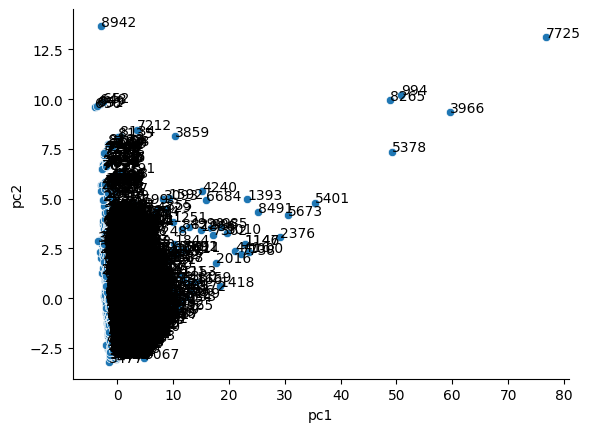

In [8]:
# plot the components
plot_components(pcs_df)